In [1]:
import sys
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

sys.path.insert(0, os.path.abspath('..'))

from src.models.reshape import data_for_timeframe
from src.visualization.visualize import change_matplotlib_font

change_matplotlib_font()

font family:  ['Noto Sans KR']


In [2]:
listen_history = pd.read_parquet("../data/processed/listen_history.parquet.gzip")
listen_history.head()

,title,subtitles,time,artist,date,month
0,right where you left me (bonus track),"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-08-04 16:43:04.189000+00:00,Taylor Swift,2023-08-04,2023-08-01
1,Last Kiss (Taylor's Version),"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-08-04 16:36:53.707000+00:00,Taylor Swift,2023-08-04,2023-08-01
2,Love Story (Taylor’s Version),"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-08-04 16:32:56.779000+00:00,Taylor Swift,2023-08-04,2023-08-01
3,Mine (Taylor's Version),"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-08-04 16:29:04.570000+00:00,Taylor Swift,2023-08-04,2023-08-01
4,Snow On The Beach,"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-08-04 16:24:48.046000+00:00,Taylor Swift,2023-08-04,2023-08-01


In [14]:
def artist_share_by_month(n_months):
    n_months_of_data_grouped = (
        data_for_timeframe(listen_history, n_months)
            .groupby(['month', 'artist'])
            .size()
            .reset_index(name='count')
    )

    n_months_of_data_grouped['percentage'] = n_months_of_data_grouped['count'] / n_months_of_data_grouped.groupby('month')['count'].transform('sum') * 100
    artist_share_by_month = (
        n_months_of_data_grouped[['month', 'artist', 'percentage']]
        .groupby(['month', 'artist'])
        .sum()
        .reset_index()
        .pivot(index='month', columns='artist', values='percentage').fillna(0)
        .reset_index()
    )
    artist_share_by_month.set_index('month', inplace=True)
    return artist_share_by_month

artist_share_by_month(12).tail()

artist,A Great Big World,AURORA,AViVA,Adele,Agnes Obel,AgtfCZ,Agunda,Aida Garifullina,Alan Azte,Aleksandr Donskikh,...,Ólafur Arnalds,Воплі Відоплясова,Генеральний штаб ЗСУ,Наталия Фаустова,Новелла Матвеева,りょうたRyouta,ガルナ(オワタP),夢の流れ,浜口 史郎,賽河原幸之助.
month,,,,,,,,,,,,,,,,,,,,,
2023-04-01,0.000000,0.000000,0.254453,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.508906,0.0,0.0,1.781170,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-01,0.000000,1.049869,0.000000,0.262467,0.262467,0.0,0.262467,0.0,0.0,0.0,...,0.787402,0.0,0.0,2.362205,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-01,0.186916,0.934579,0.186916,0.186916,0.373832,0.0,0.186916,0.0,0.0,0.0,...,0.560748,0.0,0.0,1.308411,0.0,0.0,0.0,0.0,0.0,0.0
2023-07-01,0.224719,1.348315,0.224719,0.224719,0.224719,0.0,0.000000,0.0,0.0,0.0,...,0.224719,0.0,0.0,0.674157,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
def plot_for_artist(df, artist, n_months):
    col = df.pop(artist)
    df.insert(0, col.name, col)
    
    grays = ['0.4', '0.6', '0.8']
    colors = ["coral"] + grays * math.ceil((len(df.columns) - 1)/len(grays))

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.stackplot(df.index, df.T, labels=df.columns, alpha=0.7, colors=colors)

    ax.set_title(f'Ratio of {artist} Listens vs. Other Artist Listens Each Month Over {n_months} Months')
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Month')
    ax.legend([artist, 'Other']);

    plt.show()
    fig.savefig(f"../reports/figures/artists/ratio_of_{artist.lower().replace(' ', '_')}_listens_over_{n_months}_months.png")

/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_80176/680611357.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0, col.name, col)


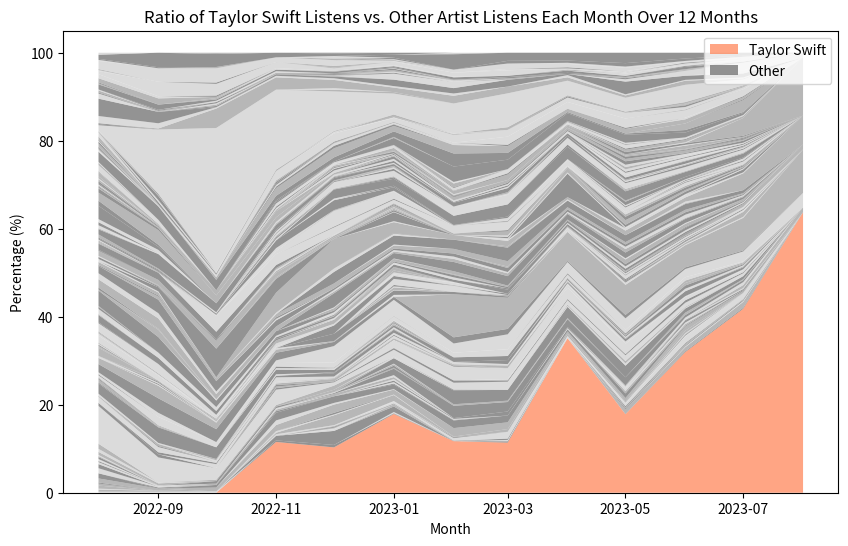

In [26]:
artist_share_over_12_months = artist_share_by_month(12)
plot_for_artist(artist_share_over_12_months, 'Taylor Swift', 12)

/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_80176/680611357.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0, col.name, col)


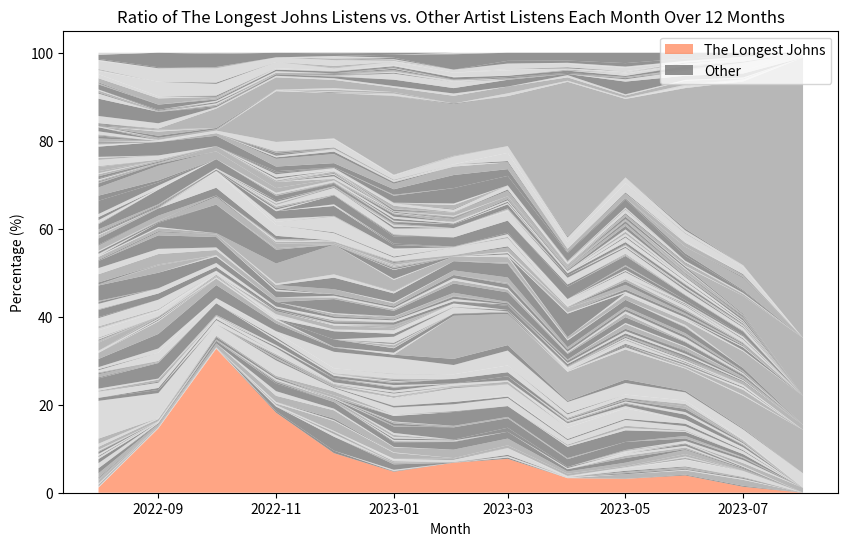

In [27]:
artist_share_over_12_months = artist_share_by_month(12)
plot_for_artist(artist_share_over_12_months, 'The Longest Johns', 12)

/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_80176/680611357.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0, col.name, col)


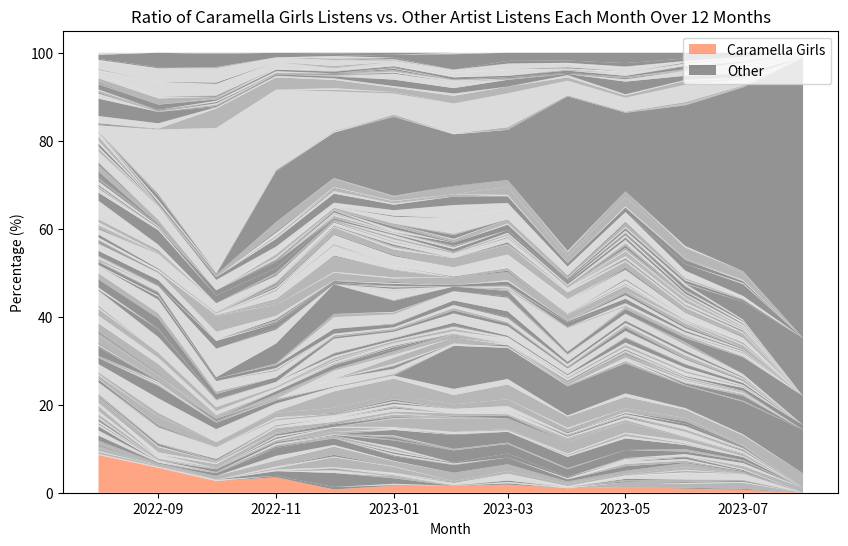

In [28]:
artist_share_over_12_months = artist_share_by_month(12)
plot_for_artist(artist_share_over_12_months, 'Caramella Girls', 12)

In [4]:
number_of_top_artists = 9
n_months = 12
twelve_months_of_data_grouped = (
    data_for_timeframe(listen_history, n_months)
        .groupby(['month', 'artist'])
        .size()
        .reset_index(name='count')
)

# top_3_listen_history_by_date = (
#     twelve_months_of_data_grouped
#     .groupby('month')
#     .apply(lambda group: group.sort_values('count', ascending=False).head(3))
#     .reset_index(drop=True))

top_n_artists = (
        twelve_months_of_data_grouped
        .groupby('artist')
        .sum()
        .reset_index()
        .sort_values("count", ascending=False)
        .head(number_of_top_artists)['artist']
        .tolist()
    )

twelve_months_of_data_grouped['percentage'] = twelve_months_of_data_grouped['count'] / twelve_months_of_data_grouped.groupby('month')['count'].transform('sum') * 100
artist_share_by_month = (
    twelve_months_of_data_grouped[['month', 'artist', 'percentage']]
    .groupby(['month', 'artist'])
    .sum()
    .reset_index()
    .pivot(index='month', columns='artist', values='percentage').fillna(0)
    .reset_index()
)
artist_share_by_month.set_index('month', inplace=True)
col = artist_share_by_month.pop('Taylor Swift')
artist_share_by_month.insert(0, col.name, col)
artist_share_by_month

/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_80176/387516481.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  twelve_months_of_data_grouped
/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_80176/387516481.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  artist_share_by_month.insert(0, col.name, col)


artist,Taylor Swift,A Great Big World,AURORA,AViVA,Adele,Agnes Obel,AgtfCZ,Agunda,Aida Garifullina,Alan Azte,...,Ólafur Arnalds,Воплі Відоплясова,Генеральний штаб ЗСУ,Наталия Фаустова,Новелла Матвеева,りょうたRyouta,ガルナ(オワタP),夢の流れ,浜口 史郎,賽河原幸之助.
month,,,,,,,,,,,,,,,,,,,,,
2022-08-01,0.000000,0.000000,0.000000,0.232019,0.000000,0.464037,0.000000,0.000000,0.00000,0.232019,...,0.232019,0.000000,0.000000,0.000000,0.000000,0.000000,0.928074,0.000000,0.464037,0.000000
2022-09-01,0.000000,0.000000,0.000000,0.235849,0.000000,0.235849,0.000000,0.000000,0.00000,0.000000,...,0.235849,0.000000,0.000000,0.000000,0.000000,0.000000,3.301887,0.000000,0.000000,0.000000
2022-10-01,0.000000,0.000000,0.000000,0.294985,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.949853,0.294985,0.000000,0.000000
2022-11-01,11.538462,0.349650,0.000000,0.000000,1.048951,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.048951,0.000000,0.000000,0.000000
2022-12-01,10.299625,0.561798,0.000000,0.000000,3.183521,0.000000,0.374532,0.000000,0.00000,0.187266,...,0.000000,0.374532,0.561798,0.000000,0.000000,0.000000,0.561798,0.000000,0.000000,0.187266
2023-01-01,17.893545,0.113250,0.113250,0.226501,1.245753,0.453001,0.000000,0.000000,0.11325,0.000000,...,0.339751,0.000000,0.000000,0.679502,0.000000,0.000000,0.453001,0.000000,0.000000,0.000000
2023-02-01,11.713287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,3.496503,0.174825,0.174825,0.000000,0.000000,0.000000,0.000000
2023-03-01,11.384615,0.307692,0.000000,0.307692,0.307692,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.615385,0.000000,0.000000,1.846154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-04-01,35.114504,0.000000,0.000000,0.254453,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.508906,0.000000,0.000000,1.781170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


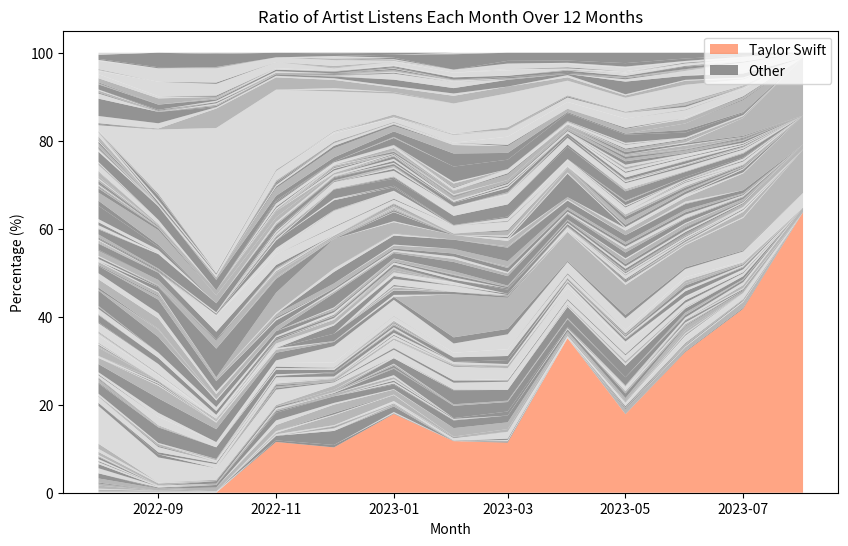

In [5]:
grays = ['0.4', '0.6', '0.8']
colors = ["coral"] + grays * math.ceil((len(artist_share_by_month.columns) - 1)/len(grays))

fig, ax = plt.subplots(figsize=(10, 6))

ax.stackplot(artist_share_by_month.index, artist_share_by_month.T, labels=artist_share_by_month.columns, alpha=0.7, colors=colors)

ax.set_title(f"Ratio of Artist Listens Each Month Over {n_months} Months")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Month")
ax.legend(["Taylor Swift", "Other"]);

plt.show()
fig.savefig(f"../reports/figures/artists/ratio_of_taylor_swift_listens_over_{n_months}_months.png")